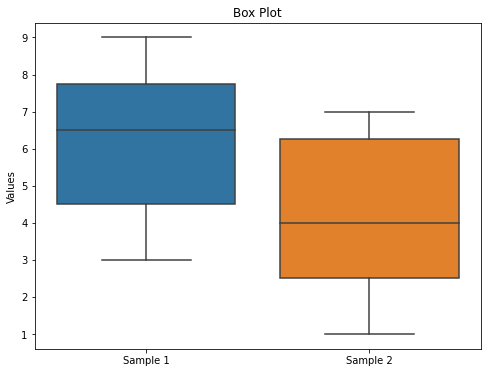

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 데이터 정의
sample1 = [7, 3, 9, 6, 4, 8]
sample2 = [4, 1, 7, 2, 4, 7]

# 데이터 결합
data = [sample1, sample2]

# 상자 박스 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)

# 그래프 설정
plt.xticks([0, 1], ['Sample 1', 'Sample 2'])
plt.title('Box Plot')
plt.ylabel('Values')

# 그래프 표시
plt.show()


# 표본 1에서 표본 2를 뺀 값들 각각에 대한 차이를 계산하여라

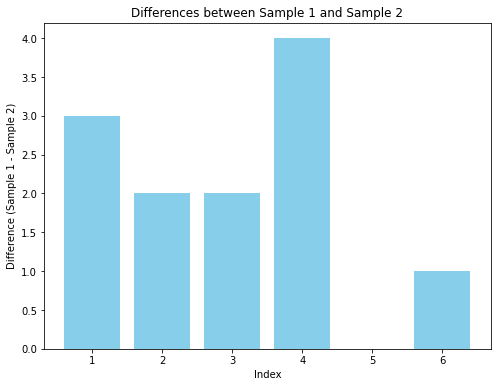

차이 값: [3, 2, 2, 4, 0, 1]


In [2]:
import matplotlib.pyplot as plt

# 표본 데이터 정의
sample1 = [7, 3, 9, 6, 4, 8]
sample2 = [4, 1, 7, 2, 4, 7]

# 차이 계산
differences = [s1 - s2 for s1, s2 in zip(sample1, sample2)]

# 바 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(range(len(differences)), differences, color='skyblue')

# 그래프 설정
plt.xticks(range(len(differences)), ['1', '2', '3', '4', '5', '6'])
plt.title('Differences between Sample 1 and Sample 2')
plt.xlabel('Index')
plt.ylabel('Difference (Sample 1 - Sample 2)')

# 그래프 표시
plt.show()

#차이값 표시
print("차이 값:", differences)

# 2.만약 u1과 u2가 모집단1과 모집단2의 평균이라면 u1ㅘ u2를 이용하여 uD를 나타대어라 

In [3]:
# 샘플 데이터 정의
sample1 = [7, 3, 9, 6, 4, 8]
sample2 = [4, 1, 7, 2, 4, 7]

# 1. 각각의 차이를 구한 후 평균 계산
differences = [s1 - s2 for s1, s2 in zip(sample1, sample2)]
mean_difference = sum(differences) / len(differences)
print("각각의 차이를 구한 후 평균:", mean_difference)

# 2. 각 샘플의 평균을 구한 후 평균 차이 계산
mean_sample1 = sum(sample1) / len(sample1)
mean_sample2 = sum(sample2) / len(sample2)
mean_difference2 = mean_sample1 - mean_sample2
print("모집단 평균을 이용한 평균 차이:", mean_difference2)


각각의 차이를 구한 후 평균: 2.0
모집단 평균을 이용한 평균 차이: 2.0


# 3. u_d 95%의 신뢰구간을 구하여라

$$\bar{d} \pm t_{\alpha/2} \times \frac{s_d}{\sqrt{n}}$$

$$S_d = \sqrt{\frac{s_1^2}{n_1} + \frac{ s_2^2}{n_2}}$$



In [12]:
import numpy as np
import scipy.stats as stats

# 샘플 데이터 정의
sample1 = np.array([7, 3, 9, 6, 4, 8])  # 표본 1
sample2 = np.array([4, 1, 7, 2, 4, 7])  # 표본 2

# 1. 차이 계산
differences = sample1 - sample2

# 2. 평균과 표준편차 계산
mean_difference = np.mean(differences)
std_difference = np.std(differences, ddof=1)  # 샘플 표준편차
n = len(differences)

# 3. t-값 찾기 (자유도)
df = n - 1
t_critical = stats.t.ppf(1 - 0.025, df)  # 95% 신뢰수준, 양측검정이므로 0.025

# 4. 신뢰구간 계산
margin_of_error = t_critical * (std_difference / np.sqrt(n))
confidence_interval = (mean_difference - margin_of_error, mean_difference + margin_of_error)

# 결과 출력
print("차이의 평균:", mean_difference)
print("95% 신뢰구간:", confidence_interval)


차이의 평균: 2.0
95% 신뢰구간: (0.5158738846565174, 3.4841261153434826)


Text(0, 0.5, 'Mean Difference')

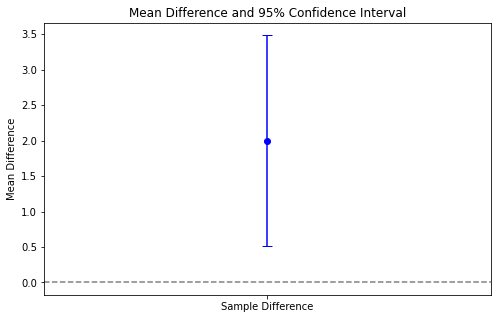

In [14]:
# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.errorbar(x=1, y=mean_difference, yerr=margin_of_error, fmt='o', capsize=5, color='b', label='Mean Difference (Confidence Interval)')
plt.axhline(0, color='gray', linestyle='--', label='Zero Line')
plt.xticks([1], ['Sample Difference'])
plt.xlim(0.5, 1.5)
plt.title('Mean Difference and 95% Confidence Interval')
plt.ylabel('Mean Difference')


# 4.문제 (3)에서 구한 구간이 통계적으로 유효하기 위해 필요한 가정은 무엇인가? 이 가정은 이 이치적으로 합당한가? 설명하여라.


### 독립성
실험설계 단계에서 유의해야 할 문제

### 정규성
QQ플롯이랑 Shapiro-Wilk 테스트

### 등분산성
이거 과제할때는 안 중요하다고 했는데 그래도 우선은 해야 하는게 맞는 것 같음

In [5]:
# 1. 정규성 검증 (Shapiro-Wilk 검정)
shapiro_test1 = stats.shapiro(sample1)
shapiro_test2 = stats.shapiro(sample2)

print("샘플 1의 Shapiro-Wilk 검정 결과:", shapiro_test1)
print("샘플 2의 Shapiro-Wilk 검정 결과:", shapiro_test2)

# p-value를 기준으로 정규성 검증
alpha = 0.05
if shapiro_test1.pvalue > alpha:
    print("샘플 1은 정규성을 만족합니다.")
else:
    print("샘플 1은 정규성을 만족하지 않습니다.")

if shapiro_test2.pvalue > alpha:
    print("샘플 2는 정규성을 만족합니다.")
else:
    print("샘플 2는 정규성을 만족하지 않습니다.")

# 2. 등분산성 검증 (Levene's test)
levene_test = stats.levene(sample1, sample2)
print("Levene's test 결과:", levene_test)

# p-value를 기준으로 등분산성 검증
if levene_test.pvalue > alpha:
    print("두 샘플은 등분산성을 만족합니다.")
else:
    print("두 샘플은 등분산성을 만족하지 않습니다.")


샘플 1의 Shapiro-Wilk 검정 결과: ShapiroResult(statistic=0.9575421810150146, pvalue=0.8006122708320618)
샘플 2의 Shapiro-Wilk 검정 결과: ShapiroResult(statistic=0.8978018164634705, pvalue=0.3610997796058655)
샘플 1은 정규성을 만족합니다.
샘플 2는 정규성을 만족합니다.
Levene's test 결과: LeveneResult(statistic=0.0, pvalue=1.0)
두 샘플은 등분산성을 만족합니다.


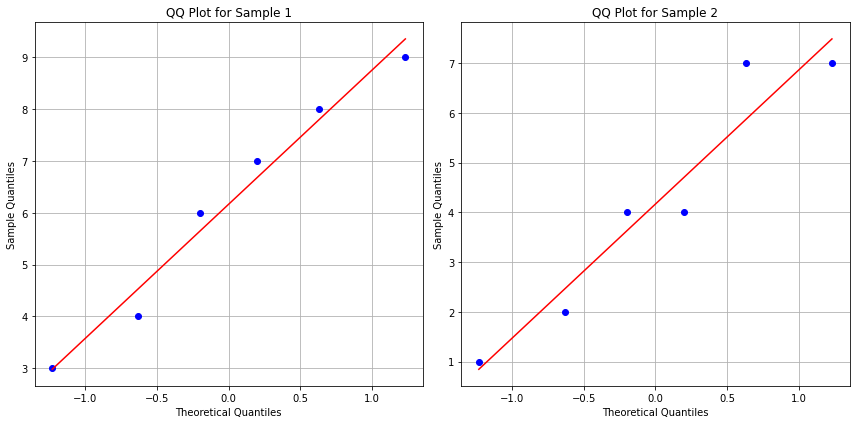

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 샘플 데이터 정의
sample1 = np.array([7, 3, 9, 6, 4, 8])
sample2 = np.array([4, 1, 7, 2, 4, 7])

# QQ 플롯 생성 함수
def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid()

# QQ Plot for Sample 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
qq_plot(sample1, 'QQ Plot for Sample 1')

# QQ Plot for Sample 2
plt.subplot(1, 2, 2)
qq_plot(sample2, 'QQ Plot for Sample 2')


# 플롯 표시
plt.tight_layout()
plt.show()


# 5.귀무가설 u_d=0 대립가설 u_d=/0 유의수준 0.05

In [26]:
import numpy as np
import scipy.stats as stats

# 샘플 데이터 정의
sample1 = np.array([7, 3, 9, 6, 4, 8])  # 표본 1
sample2 = np.array([4, 1, 7, 2, 4, 7])  # 표본 2

# 1. 차이 계산
differences = sample1 - sample2

# 2. 평균과 표준편차 계산
mean_difference = np.mean(differences)
std_difference = np.std(differences, ddof=1)  # 샘플 표준편차
n = len(differences)

# 3. t-값 계산
t_statistic = mean_difference / (std_difference / np.sqrt(n))

# 4. p-값 계산 (양측검정)
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=n-1))

# 5. 유의수준 설정
alpha = 0.05

# 결과 출력
print("t-값:", t_statistic)
print("p-값:", p_value)

# 결론 도출
if p_value < alpha:
    print("귀무가설 H0를 기각합니다. (유의미한 차이가 있습니다.)")
else:
    print("귀무가설 H0를 기각할 수 없습니다. (유의미한 차이가 없습니다.)")


t-값: 3.464101615137754
p-값: 0.017962884609943996
귀무가설 H0를 기각합니다. (유의미한 차이가 있습니다.)


# 분산분석

In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 데이터 입력
data = {
    'Catalyst': [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8],
    'Temperature': [30, 30, 50, 50, 70, 70, 30, 30, 50, 50, 70, 70, 30, 30, 50, 50, 70, 70, 30, 30, 50, 50, 70, 70],
    'Yield': [92, 89, 97, 106, 120, 118, 93, 105, 118, 106, 134, 117, 97, 100, 125, 116, 130, 130, 90, 93, 105, 104, 115, 123]
}

df = pd.DataFrame(data)

# ANOVA 모델 적합
model = ols('Yield ~ C(Catalyst) + C(Temperature) + C(Catalyst ):C(Temperature)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                               sum_sq      df       F  PR(>F)
C(Catalyst)                  647.4583  3.0000  6.2032  0.0087
C(Temperature)             3,250.3333  2.0000 46.7114  0.0000
C(Catalyst):C(Temperature)    79.6667  6.0000  0.3816  0.8770
Residual                     417.5000 12.0000     nan     nan


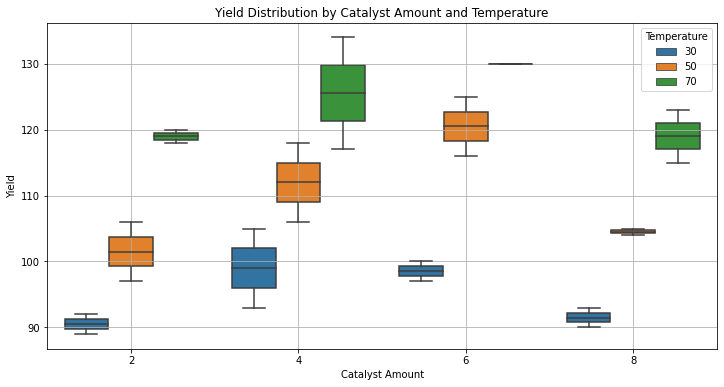

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Catalyst', y='Yield', hue='Temperature', data=df)
plt.title('Yield Distribution by Catalyst Amount and Temperature')
plt.xlabel('Catalyst')
plt.ylabel('Yield')
plt.legend(title='Temperature')
plt.grid(True)
plt.show()


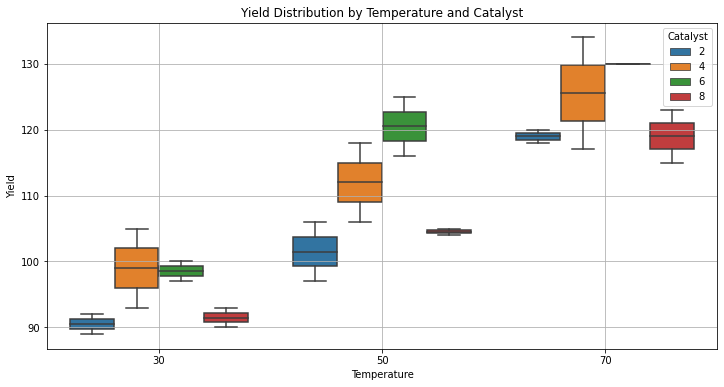

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Temperature', y='Yield', hue='Catalyst', data=df)
plt.title('Yield Distribution by Temperature and Catalyst')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.legend(title='Catalyst')
plt.grid(True)
plt.show()


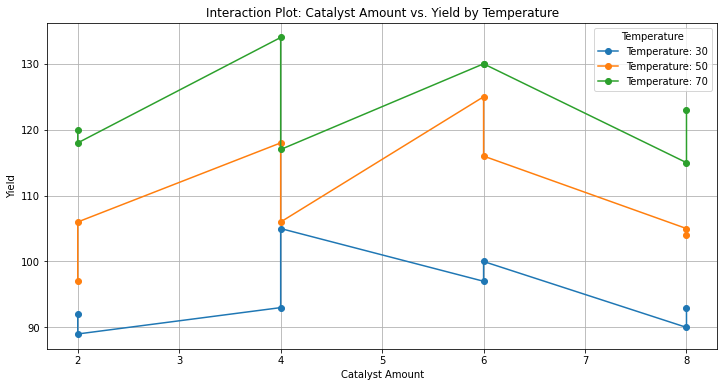

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for temp in df['Temperature'].unique():
    subset = df[df['Temperature'] == temp]
    plt.plot(subset['Catalyst'], subset['Yield'], marker='o', label=f'Temperature: {temp}')

plt.title('Interaction Plot: Catalyst Amount vs. Yield by Temperature')
plt.xlabel('Catalyst Amount')
plt.ylabel('Yield')
plt.grid(True)
plt.legend(title='Temperature')
plt.show()
